### Validating the generated images based on the GAN implementation

In [68]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def gaussian_blur(image, ksize=(5, 5), sigmaX=0):
    blurred = cv2.GaussianBlur(image, ksize, sigmaX)
    return blurred

In [70]:
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

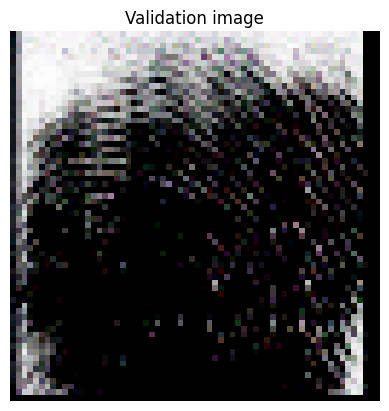

In [71]:
validate_image = cv2.imread('gen_4700.bmp')
display_image(validate_image, "Validation image")

### Fingerprint detection using the contours technique

In [72]:
def detect_fingerprint_contours(image_path):
    image = cv2.imread(image_path)
    display_image(image, "Original Image")
    # Step 1
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(gray, "Step 1: Grayscale Image")
    # Step 2
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    display_image(blurred, "Step 2: Blurred Image")
    # Step 3
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)
    display_image(magnitude, "Step 3: Edge Detection Result")
    # Step 4
    _, binary = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    display_image(binary, "Step 4: Binary Image")
    # Step 5
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    display_image(binary, "Step 5: Enhanced Binary Image")
    # Step 6
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        print("Fingerprint detected!")
        cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
        display_image(image, "Contours on fingerprint")
    else:
        print("No fingerprint detected.")

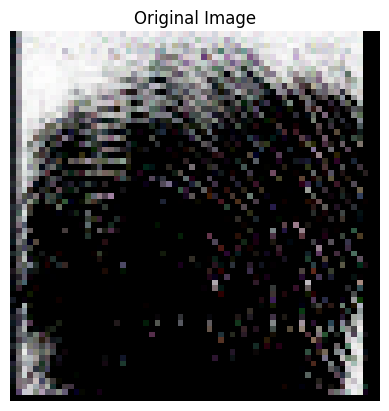

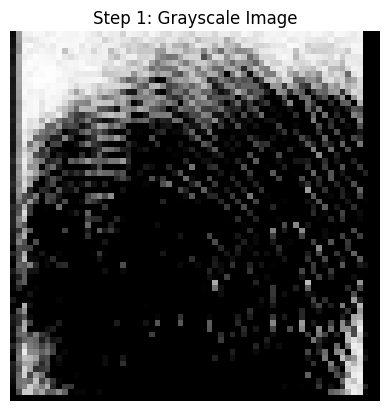

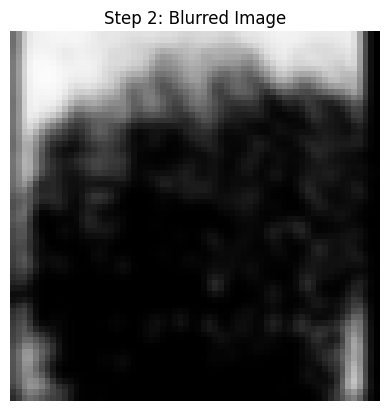

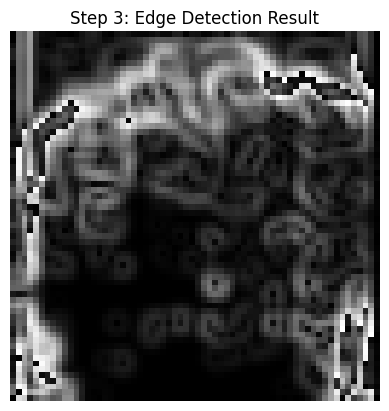

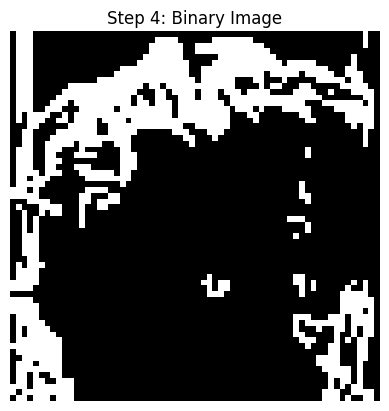

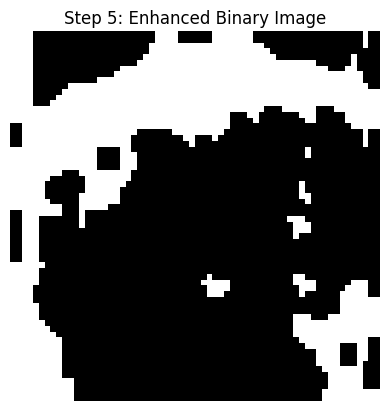

Fingerprint detected!


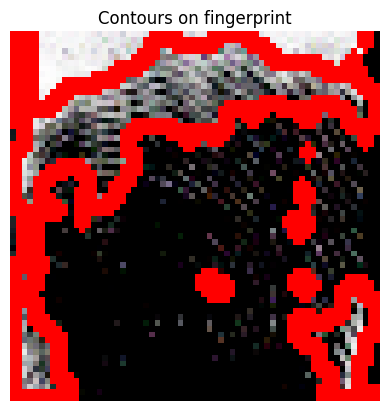

In [73]:
detect_fingerprint_contours('gen_4700.BMP')

### Finding the closed closest fingerprint from the Sokoto Coventry Fingerprint Dataset

In [74]:
# Calculating accuracy based on the number of matched keypoints and total keypoints
def calculate_accuracy(match_points, total_keypoints):
    return len(match_points) / total_keypoints * 100

In [75]:
# Calculating the best matching result
best_score = 0
best_filename = None
best_image = None
best_kp1 = None
best_kp2 = None
best_mp = None

In [76]:
# Path to Sokoto Coventry Fingerprint Dataset Real Images
real_images_dir = "../Datasets/Sokoto Coventry Fingerprint Dataset/Real"

In [77]:
for counter, file in enumerate(os.listdir(real_images_dir)):
    if counter % 50 == 0:
        print("Processing image", counter)
    fingerprint_path = os.path.join(real_images_dir, file)
    fingerprint_img = cv2.imread(fingerprint_path)
    sift = cv2.SIFT_create()
    keypoints_1, des1 = sift.detectAndCompute(validate_image, None)
    keypoints_2, des2 = sift.detectAndCompute(fingerprint_img, None)
    matcher = cv2.FlannBasedMatcher({"algorithm": 1, "trees": 10}, {})
    matches = matcher.knnMatch(des1, des2, k=2)
    match_points = [p for p, q in matches if p.distance < 0.1 * q.distance]
    total_keypoints = min(len(keypoints_1), len(keypoints_2))
    score = calculate_accuracy(match_points, total_keypoints)
    if score > best_score:
        best_score = score
        best_filename = file
        best_image = fingerprint_img
        best_kp1, best_kp2, best_mp = keypoints_1, keypoints_2, match_points

Processing image 0
Processing image 50
Processing image 100
Processing image 150
Processing image 200
Processing image 250
Processing image 300
Processing image 350
Processing image 400
Processing image 450
Processing image 500
Processing image 550
Processing image 600
Processing image 650
Processing image 700
Processing image 750
Processing image 800
Processing image 850
Processing image 900
Processing image 950
Processing image 1000
Processing image 1050
Processing image 1100
Processing image 1150
Processing image 1200
Processing image 1250
Processing image 1300
Processing image 1350
Processing image 1400
Processing image 1450
Processing image 1500
Processing image 1550
Processing image 1600
Processing image 1650
Processing image 1700
Processing image 1750
Processing image 1800
Processing image 1850
Processing image 1900
Processing image 1950
Processing image 2000
Processing image 2050
Processing image 2100
Processing image 2150
Processing image 2200
Processing image 2250
Processing 

In [78]:
print("Best match:", best_filename)
print("Best score:", best_score)

Best match: None
Best score: 0


In [79]:
if best_mp:
    result = cv2.drawMatches(validate_image, best_kp1, best_image, best_kp2, best_mp, None)
    result = cv2.resize(result, None, fx=5, fy=5)
    image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Best Match")
    plt.axis("off")
    plt.show()